In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import pandas as pd
import scipy as sp
import seaborn as sns
from scipy import stats

sns.set_theme("talk")
sns.set_style("darkgrid")

%matplotlib inline
%config Inline.figure_format = 'retina'

In [2]:
df = pd.read_csv("ige_ege.csv")
df["adaptation"] = np.nan
df["total error"] = np.nan
df.columns

Index(['si', 'SN', 'id', 'tester', 'TN', 'move_cycle', 'hX', 'hY', 'rot_hX',
       'rot_hY', 'rotation', 'hand_max_dist', 'radvelmax', 'tgtX', 'tgtY',
       'rot_hand_theta', 'theta_maxradv', 'raw_ep_hand_ang', 'tgt_ang',
       'tgt_dist', 'fbi', 'MT', 'RT', 'ST', 'adaptation', 'total error'],
      dtype='object')

In [3]:
# Find outliers and remove based on hard threshold
outlier_idx = np.where(np.abs(df.theta_maxradv) >= 45)
outlier_idx = np.asarray(outlier_idx).flatten()
print(f'Total number of outliers: ', len(outlier_idx))
cols = ["rotation", "rot_hand_theta", "theta_maxradv", "raw_ep_hand_ang", "MT", "RT"]
df.loc[outlier_idx, cols] = np.nan
# df.loc[outlier_idx, :] = np.nan

Total number of outliers:  68


Adaptation to ege-vmr has slope of nan, p-val of nan.
Adaptation to ige on rotation trials has slope of nan, p-val of nan.
Adaptation to ege-vmr has slope of nan, p-val of nan.
Adaptation to ige on rotation trials has slope of nan, p-val of nan.


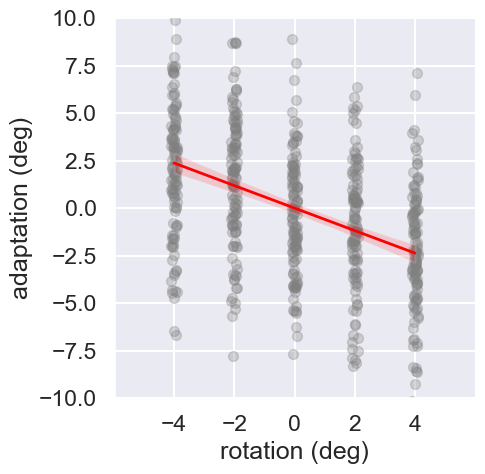

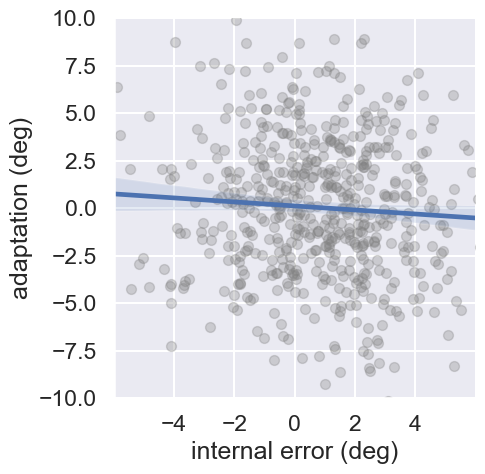

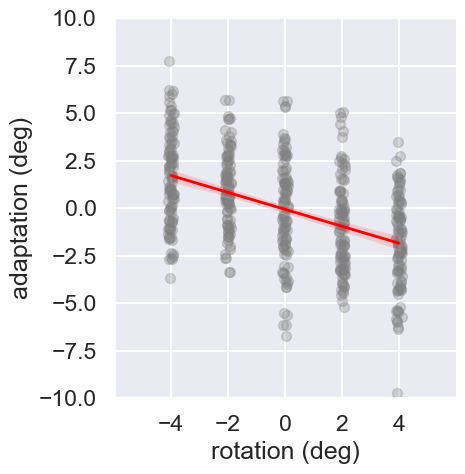

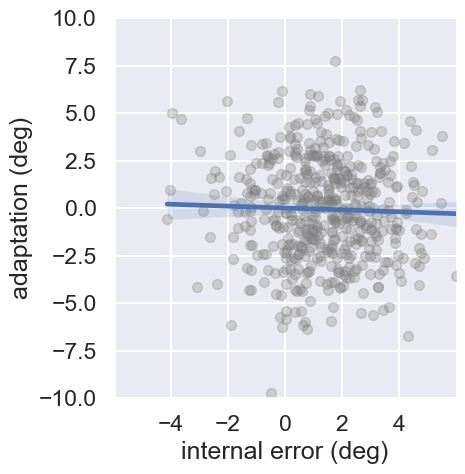

In [4]:
for s in df["id"].unique():
    # Create subject-specific data frame
    subj = df[df["id"] == s].reset_index()
    
    # Create truncated data frame without baseline trials
    training_start = 70
    pert_idx = np.arange(training_start, 1270, 2)
    subj_train = subj.iloc[training_start - 1:, :]
    
    # Loop through trials to get adaptation index
    for i in np.arange(training_start, subj["TN"].max(), 2):
        subj_train.loc[i, "adaptation"] = subj_train.loc[i+1, "theta_maxradv"] - subj_train.loc[i-1, "theta_maxradv"] 
        subj_train.loc[i, "total error"] = subj_train.loc[i, "theta_maxradv"] + subj_train.loc[i, "rotation"]
    
    subj_adapt = subj_train.loc[pert_idx, :].reset_index()
    
    # Plot data for adapt vs ege
    g = sns.lmplot(data=subj_adapt, x="rotation", y="adaptation", x_jitter=0.1, 
               scatter_kws=dict(alpha=0.3, color='gray', s=50), 
               line_kws=dict(linewidth=2, color='red'), ci=95)
    g.set(ylim=(-10, 10), xlim=(-6, 6), xticks=[-4, -2, 0, 2, 4], alpha=0.1, 
      xlabel="rotation (deg)", ylabel="adaptation (deg)")
    
    # Plot data for adapt vs ige
    g = sns.lmplot(data=subj_adapt, x="theta_maxradv", y="adaptation", x_jitter=0.1, 
               scatter_kws=dict(alpha=0.3, color='gray', s=50), ci=95)
    g.set(ylim=(-10, 10), xlim=(-6, 6), xticks=[-4, -2, 0, 2, 4], alpha=0.1, 
      xlabel="internal error (deg)", ylabel="adaptation (deg)");
    
    # Print out statistics (TO DO: handle outliers or linregress does not work)
    slope, intercept, r_value, p_value, std_err = stats.linregress(subj_adapt["rotation"], subj_adapt["adaptation"])
    print(f"Adaptation to ege-vmr has slope of {slope}, p-val of {p_value}.")

    slope, intercept, r_value, p_value, std_err = stats.linregress(subj_adapt["theta_maxradv"], subj_adapt["adaptation"])
    print(f"Adaptation to ige on rotation trials has slope of {slope}, p-val of {p_value}.")
 